In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_1samp
from scipy.stats import shapiro, norm
from scipy.stats import wilcoxon
import plotly.express as px 



## Exploratory Data Analysis

In [2]:
Exp_and_Imp = pd.read_csv('import_and_export.csv')

In [3]:
Exp_and_Imp.head()

,location,category,flow,measure,Unit,Date,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376


In [4]:
Exp_and_Imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  60 non-null     object 
 1   category  60 non-null     object 
 2   flow      60 non-null     object 
 3   measure   60 non-null     object 
 4   Unit      60 non-null     object 
 5   Date      60 non-null     int64  
 6   Value     60 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.4+ KB


In [5]:
Exp_and_Imp.dtypes

location     object
category     object
flow         object
measure      object
Unit         object
Date          int64
Value       float64
dtype: object

In [6]:
Exp_and_Imp = Exp_and_Imp.drop(['Unit'],axis=1) 
Exp_and_Imp.head(60) 


,location,category,flow,measure,Date,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376
5,Ireland,Construction,Exports,US Dollars at current prices in millions,2017,85.856
6,Ireland,Construction,Exports,US Dollars at current prices in millions,2018,932.954
7,Ireland,Construction,Exports,US Dollars at current prices in millions,2019,930.283
8,Ireland,Construction,Exports,US Dollars at current prices in millions,2020,871.496
9,Ireland,Construction,Exports,US Dollars at current prices in millions,2021,994.685


In [7]:
# Renaming the column names 

Exp_and_Imp = Exp_and_Imp.rename(columns={"Date":"Year","location":"Country"})
Exp_and_Imp.head()


,Country,category,flow,measure,Year,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376


In [8]:
Exp_and_Imp.shape 

(60, 6)

In [9]:
duplicate_rows_df= Exp_and_Imp[Exp_and_Imp.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [10]:
print(Exp_and_Imp.isnull().sum()) 


Country     0
category    0
flow        0
measure     0
Year        0
Value       0
dtype: int64


## Descriptive Statistics

In [11]:
Exp_and_Imp.describe() # Why does it looks like this ??

,Year,Value
count,60.00000,60.000000
mean,2016.50000,2180.134800
std,2.89652,1461.661048
min,2012.00000,67.734000
25%,2014.00000,979.252250
50%,2016.50000,2315.629000
75%,2019.00000,3161.097500
max,2021.00000,5437.156000


In [12]:
# Summary of my categorical data 
Exp_and_Imp.describe(include=object) 

,Country,category,flow,measure
count,60,60,60,60
unique,3,1,2,1
top,Ireland,Construction,Exports,US Dollars at current prices in millions
freq,20,60,30,60


In [13]:
# mode of the categorical feature
mode = Exp_and_Imp['Country'].mode()
print(mode)

0            France
1           Ireland
2    United Kingdom
Name: Country, dtype: object


In [14]:
# median of the numerical feature
median = Exp_and_Imp['Value'].median()
print(median)

2315.629


## Plots to illustrate  findings 

Text(0.5, 1.0, 'Box plot Value')

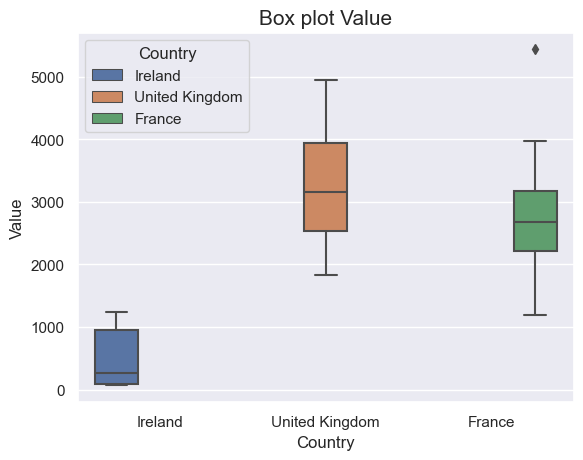

In [15]:
# Boxplot of the Column "Country"
sns.boxplot(x = 'Country', y ='Value',
            data=Exp_and_Imp, hue = 'Country')
plt.title('Box plot Value',
          fontsize=15)

In [16]:
# Filter the data to only include imports and exports
data = Exp_and_Imp[Exp_and_Imp['flow'].isin(['Imports', 'Exports'])]

<AxesSubplot:ylabel='Year'>

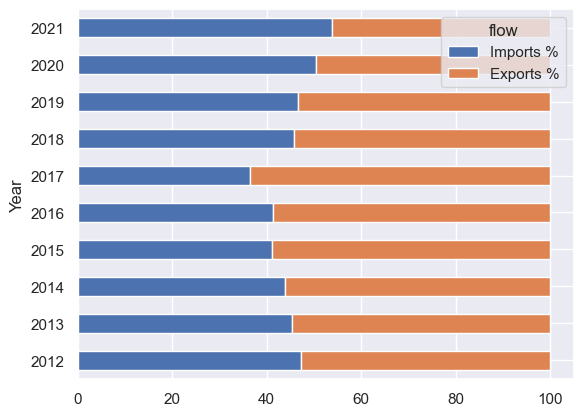

In [17]:
# Pivot the data to create a new DataFrame with years as columns and flows as rows
pivot_data = data.pivot_table(index='Year', columns= ['flow'], values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports'] 
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

pivot_data = data.pivot_table(index='Year', columns='flow', values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports']
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

# Create a horizontal stacked bar chart
pivot_data[['Imports %', 'Exports %']].plot(kind='barh', stacked=True)

## Normal distribution 

In [18]:
#Extracting the column 'Value'
values = Exp_and_Imp['Value']
# check if the data comes from a normal distribution using the Shapiro-Wilk test
stat, p = shapiro(values)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data comes from a normal distribution')
else:
    print('The data does not come from a normal distribution')


Shapiro-Wilk Test: Statistics=0.956, p=0.029
The data does not come from a normal distribution


In [19]:
# generate a normal distribution with the same mean and standard deviation as the dat 
mu, std = norm.fit(values)
print('Mean: %.2f, Standard Deviation: %.2f' % (mu, std))

Mean: 2180.13, Standard Deviation: 1449.43


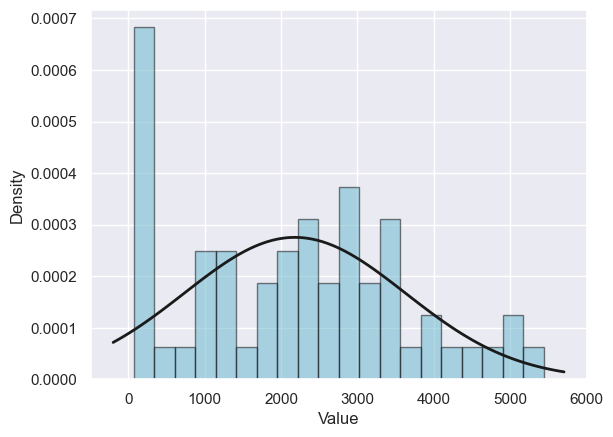

In [20]:
#  Histogram of the data and the probability density function of the normal distribution
plt.hist(values, bins=20, density=True, edgecolor='black', color='c', alpha=0.50)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Non parametric 

## Wilcoxon.

In [21]:
# Group the data by country
grouped_data = data.groupby("Country")

# Perform the Wilcoxon signed-rank test for each country
for country, group in grouped_data:
    # Extract the construction export values for each year
    values_2017 = group[group["Year"] == 2017]["Value"]
    values_2018 = group[group["Year"] == 2018]["Value"]
    values_2019 = group[group["Year"] == 2019]["Value"]
    values_2020 = group[group["Year"] == 2020]["Value"]
    values_2021 = group[group["Year"] == 2021]["Value"]
    
    # Perform the Wilcoxon signed-rank test for each pair of years
    _, p_value_2017_2018 = wilcoxon(values_2017, values_2018)
    _, p_value_2018_2019 = wilcoxon(values_2018, values_2019)
    _, p_value_2019_2020 = wilcoxon(values_2019, values_2020)
    _, p_value_2020_2021 = wilcoxon(values_2020, values_2021)
    
    # Print the p-values for each pair of years
    print(country)
    print("2017-2018: p =", p_value_2017_2018)
    print("2018-2019: p =", p_value_2018_2019)
    print("2019-2020: p =", p_value_2019_2020)
    print("2020-2021: p =", p_value_2020_2021)
    print("\n")


France
2017-2018: p = 0.5
2018-2019: p = 1.0
2019-2020: p = 0.5
2020-2021: p = 1.0


Ireland
2017-2018: p = 0.5
2018-2019: p = 0.5
2019-2020: p = 0.5
2020-2021: p = 0.5


United Kingdom
2017-2018: p = 0.5
2018-2019: p = 0.5
2019-2020: p = 0.5
2020-2021: p = 1.0




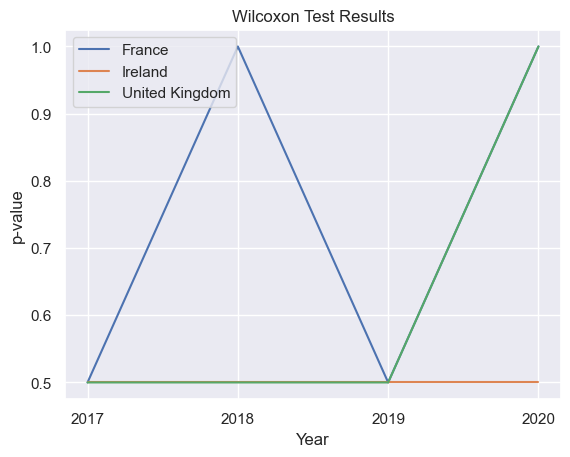

In [22]:
# Graph of the results
# Define x-axis values (years)
years = [2017, 2018, 2019, 2020]

# Set the x-axis ticks to display as whole numbers
plt.xticks(years, [int(year) for year in years])

# Define y-axis values for each country
france = [0.5, 1.0, 0.5, 1.0]
ireland = [0.5, 0.5, 0.5, 0.5]
uk = [0.5, 0.5, 0.5, 1.0]

# Create the line graph
plt.plot(years, france, label='France')
plt.plot(years, ireland, label='Ireland')
plt.plot(years, uk, label='United Kingdom')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('p-value')
plt.title('Wilcoxon Test Results')
plt.legend()

# Show the graph
plt.show()


## Wilcoxon Imports

In [23]:
# Subset the data to only include construction imports
imports_of_construction = Exp_and_Imp[Exp_and_Imp['category'] == 'Construction'][Exp_and_Imp['flow'] == 'Imports']

# Subset the data to only include Ireland and the United Kingdom
ie_uk_importsonly = imports_of_construction[(imports_of_construction['Country'] == 'Ireland') | (imports_of_construction['Country'] == 'United Kingdom')]

# Pivot the data to have Ireland and the United Kingdom as columns and years as rows
uk_ie_table = pd.pivot_table(ie_uk_importsonly, values='Value', index='Year', columns='Country')


In [24]:
# Run the Wilcoxon test
stat, p = wilcoxon(uk_ie_table['Ireland'], uk_ie_table['United Kingdom'])

print("Wilcoxon test results:")
print("Statistical test statistic:", stat)
print("p-value:", p)

Wilcoxon test results:
Statistical test statistic: 0.0
p-value: 0.001953125


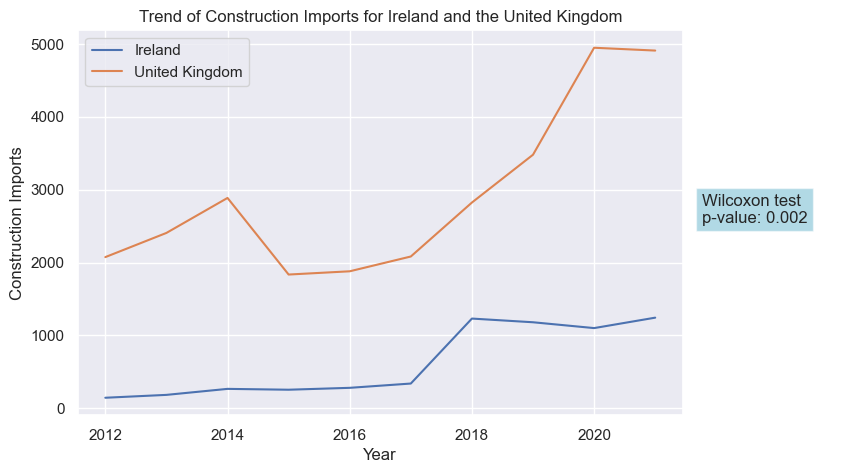

In [25]:
import matplotlib.gridspec as gridspec

# Create a 1x2 grid with the widths ratio of 4:1
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [4, 1]})

# Plot the data on the first subplot
ax1.plot(uk_ie_table.index, uk_ie_table['Ireland'], label='Ireland')
ax1.plot(uk_ie_table.index, uk_ie_table['United Kingdom'], label='United Kingdom')

# Add labels and annotations
ax1.set_xlabel('Year')
ax1.set_ylabel('Construction Imports')
ax1.set_title('Trend of Construction Imports for Ireland and the United Kingdom')
ax1.legend()

# Add the text box on the second subplot
ax2.text(0, 0.5, 'Wilcoxon test\np-value: {:.3f}'.format(p), bbox=dict(facecolor='c', alpha=0.50))
ax2.axis('off')

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.05)

# Show the plot
plt.show()


## The Kruskal-Wallis Test

In [26]:
group1 = Exp_and_Imp[Exp_and_Imp['Country'] == 'Ireland']['Value']
group2 = Exp_and_Imp[Exp_and_Imp['Country'] == 'France']['Value']
group3 = Exp_and_Imp[Exp_and_Imp['Country'] == 'United Kingdom']['Value']

In [27]:
import scipy.stats as stats

# Perform the one-way ANOVA test:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=60.142825868875015, pvalue=9.020614453578871e-15)

## Turkey-Kramer

In [28]:
# Perform Tukey-Kramer Analysis:
tukey = pairwise_tukeyhsd(endog=Exp_and_Imp['Value'],
                          groups=Exp_and_Imp['Country'],
                          alpha=0.05)

#display results
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1     group2      meandiff  p-adj    lower      upper    reject
---------------------------------------------------------------------
 France        Ireland -2221.9458    0.0 -2863.6088 -1580.2828   True
 France United Kingdom   535.6849 0.1193   -105.978  1177.3479  False
Ireland United Kingdom  2757.6307    0.0  2115.9678  3399.2937   True
---------------------------------------------------------------------


## Parametric test

In [29]:
Exp_and_Imp.agg(['skew', 'kurtosis']).transpose()

C:\Users\Sandr\AppData\Local\Temp\ipykernel_17796\2110892389.py:1: FutureWarning: ['Country', 'category', 'flow', 'measure'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Exp_and_Imp.agg(['skew', 'kurtosis']).transpose()


,skew,kurtosis
Year,0.000000,-1.225665
Value,0.182142,-0.767445


In [30]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
transformed_data, lambda_value = boxcox(Exp_and_Imp.iloc[:, 5])
Exp_and_Imp.insert(len(Exp_and_Imp.columns), 'A_Boxcox', transformed_data)


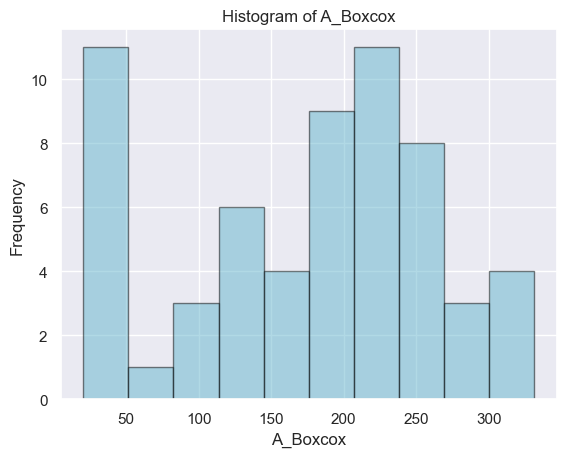

In [31]:

# Plot histogram
plt.hist(Exp_and_Imp['A_Boxcox'], bins=10, edgecolor='black', color='c',alpha=0.50)

# Add labels and title
plt.xlabel('A_Boxcox')
plt.ylabel('Frequency')
plt.title('Histogram of A_Boxcox')

# Show the plot
plt.show()


In [32]:

# Apply Shapiro-Wilk test
stat, p = shapiro(Exp_and_Imp['A_Boxcox'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('The data comes from a normal distribution')
else:
    print('The data does not come from a normal distribution')


Shapiro-Wilk Test: Statistics=0.942, p=0.007
The data does not come from a normal distribution


In [33]:

# Perform Z-score scaling (Standardization)
scaler = StandardScaler()
normalized_data_zscore = scaler.fit_transform(Exp_and_Imp[['Value']])

# Print the normalized data
print("Normalized data (Z-score scaling):\n", normalized_data_zscore)


Normalized data (Z-score scaling):
 [[-1.45626676]
 [-1.45740169]
 [-1.44913913]
 [-1.45054934]
 [-1.45143934]
 [-1.44489884]
 [-0.86046332]
 [-0.86230611]
 [-0.90286483]
 [-0.81787346]
 [-1.40485549]
 [-1.37768342]
 [-1.32081966]
 [-1.32883799]
 [-1.31092198]
 [-1.27031427]
 [-0.65514045]
 [-0.69007075]
 [-0.74525867]
 [-0.64651291]
 [ 0.26796421]
 [ 0.82668341]
 [ 1.38394961]
 [ 0.47643522]
 [ 0.60392954]
 [ 0.74862924]
 [ 1.00968991]
 [ 1.15361345]
 [ 1.67395409]
 [ 1.81424102]
 [-0.073159  ]
 [ 0.1558049 ]
 [ 0.48710011]
 [-0.23821361]
 [-0.20743667]
 [-0.06740846]
 [ 0.44359678]
 [ 0.8964688 ]
 [ 1.90923703]
 [ 1.88256308]
 [ 0.5354964 ]
 [ 0.88283861]
 [ 0.90460787]
 [ 1.23323237]
 [ 0.78538577]
 [ 2.24710585]
 [ 0.0683767 ]
 [ 0.11858543]
 [ 0.18461831]
 [-0.67833716]
 [ 0.4131717 ]
 [ 0.65284672]
 [ 0.50681752]
 [ 0.38584302]
 [ 0.13549208]
 [ 0.30017137]
 [-0.29256741]
 [-0.40120948]
 [-0.12507805]
 [-0.10142185]]


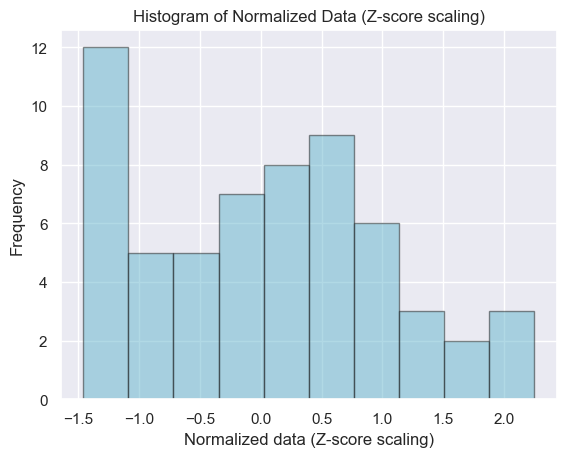

In [34]:

# Plot histogram
plt.hist(normalized_data_zscore, bins=10, color='c', edgecolor='k', alpha=0.50)

# Add labels and title
plt.xlabel('Normalized data (Z-score scaling)')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Data (Z-score scaling)')

# Show the plot
plt.show()


In [35]:
# Apply Shapiro-Wilk test
stat, p = shapiro(normalized_data_zscore)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('The data follows a normal distribution after Z-score scaling')
else:
    print('The data does not follow a normal distribution after Z-score scaling')

Shapiro-Wilk Test: Statistics=0.956, p=0.029
The data does not follow a normal distribution after Z-score scaling


## One-sample t-test

In [36]:

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(Exp_and_Imp['Value'], 0)

alpha = 0.05
if p_val > alpha:
    print("Data is not significantly from zero(the null hypothes cannot be rejected).")
else:
    print("Data is significantly different from zero (the null hypothesis can be rejected).")


Data is significantly different from zero (the null hypothesis can be rejected).


Text(0.5, 1.0, 'Histogram of Values')

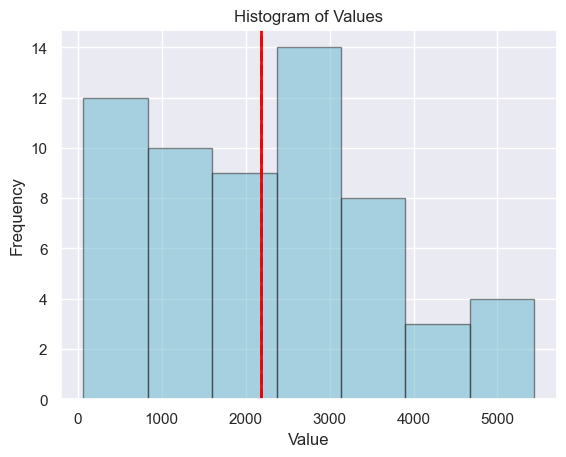

In [37]:
# Plotting the histogram
plt.hist(values, bins=7, color='c', edgecolor='k', alpha=0.50)
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)  # Sample mean
plt.axvline(mu, color='red', linestyle='solid', linewidth=2)  # Population mean

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

## Interactive Visualization 

In [41]:
country_codes = pd.read_csv("iso3.csv") 

In [42]:
country_codes.head() 


,iso3,name
0,BEL,Belgium
1,CH_,"China, mainland"
2,GGY,Guernsey
3,LUX,Luxembourg
4,TWN,"China, Taiwan Province of"


In [43]:
# Read the datasets
Exp_and_Imp = pd.read_csv('import_and_export.csv')
country_codes = pd.read_csv('iso3.csv')

# Merge the datasets based on the 'location' column in Exp_and_Imp and the 'name' column in country_codes
merged_datasets = pd.merge(Exp_and_Imp, country_codes, left_on='location', right_on='name')

# Print the merged dataset
print(merged_datasets)


          location      category     flow  \
0          Ireland  Construction  Exports   
1          Ireland  Construction  Exports   
2          Ireland  Construction  Exports   
3          Ireland  Construction  Exports   
4          Ireland  Construction  Exports   
5          Ireland  Construction  Exports   
6          Ireland  Construction  Exports   
7          Ireland  Construction  Exports   
8          Ireland  Construction  Exports   
9          Ireland  Construction  Exports   
10         Ireland  Construction  Imports   
11         Ireland  Construction  Imports   
12         Ireland  Construction  Imports   
13         Ireland  Construction  Imports   
14         Ireland  Construction  Imports   
15         Ireland  Construction  Imports   
16         Ireland  Construction  Imports   
17         Ireland  Construction  Imports   
18         Ireland  Construction  Imports   
19         Ireland  Construction  Imports   
20  United Kingdom  Construction  Exports   
21  United

In [44]:
#view the first 5 values
merged_datasets.head()

,location,category,flow,measure,Unit,Date,Value,iso3,name
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379,IRL,Ireland
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734,IRL,Ireland
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710,IRL,Ireland
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666,IRL,Ireland
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376,IRL,Ireland


In [45]:
# Drop the columns 
merged_datasets = merged_datasets.drop(['Unit','name'],axis=1) 
merged_datasets.head() 


,location,category,flow,measure,Date,Value,iso3
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379,IRL
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734,IRL
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710,IRL
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666,IRL
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376,IRL


In [46]:
# Renaming the column names 

merged_datasets = merged_datasets.rename(columns={"Date":"Year","location":"Country","iso3":"code"})
merged_datasets.head()

,Country,category,flow,measure,Year,Value,code
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379,IRL
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734,IRL
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710,IRL
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666,IRL
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376,IRL


In [47]:
fig = px.choropleth(merged_datasets, 
                    locations="code",  # column containing country names
                    color="Value",  # column by which to color-code
                    hover_name="Country",  # column to display in hover information
                    animation_frame="Year", # column on which to animate 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_geos(projection_type="natural earth")
fig.update_layout(
    title={
        'text': 'Exports and Imports in the Construction Sector by Country from 2012 to 2021 (US Dollars in millions)',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',  
    }  
)

fig.show()